# 911 Calls Analysis

____
### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading 911 data

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Top Zip codes for 911 call

In [6]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

### Top Townships for 911 call

In [7]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

### Number of unique titles in 911 data

In [8]:
df['title'].nunique()

110

### Seperating departments and reason from title column

In [9]:
def department(title):
    return title.split(':')[0]
def reason(title):
    return title.split(':')[1]

In [10]:
df['Department'] = df['title'].apply(department)
df['Reasons'] = df['title'].apply(reason)

In [11]:
df[['Department','Reasons','twp']].head()

,Department,Reasons,twp
0,EMS,BACK PAINS/INJURY,NEW HANOVER
1,EMS,DIABETIC EMERGENCY,HATFIELD TOWNSHIP
2,Fire,GAS-ODOR/LEAK,NORRISTOWN
3,EMS,CARDIAC EMERGENCY,NORRISTOWN
4,EMS,DIZZINESS,LOWER POTTSGROVE


### Most common Reason for a 911 call

In [12]:
df['Reasons'].nunique()

81

In [13]:
print("Most common reason for 911 ")
df['Reasons'].value_counts().head(1)

Most common reason for 911 


Reasons
VEHICLE ACCIDENT -    23066
Name: count, dtype: int64

In [14]:
top5reason=df['Reasons'].value_counts().head()

In [15]:
print("Top 5 maost common reason for 911 ")
print(top5reason)

Top 5 maost common reason for 911 
Reasons
VEHICLE ACCIDENT -       23066
DISABLED VEHICLE -        7702
VEHICLE ACCIDENT          5573
FIRE ALARM                5510
RESPIRATORY EMERGENCY     5112
Name: count, dtype: int64


#### Countplot of 911 calls by Department.

<Axes: xlabel='Department', ylabel='count'>

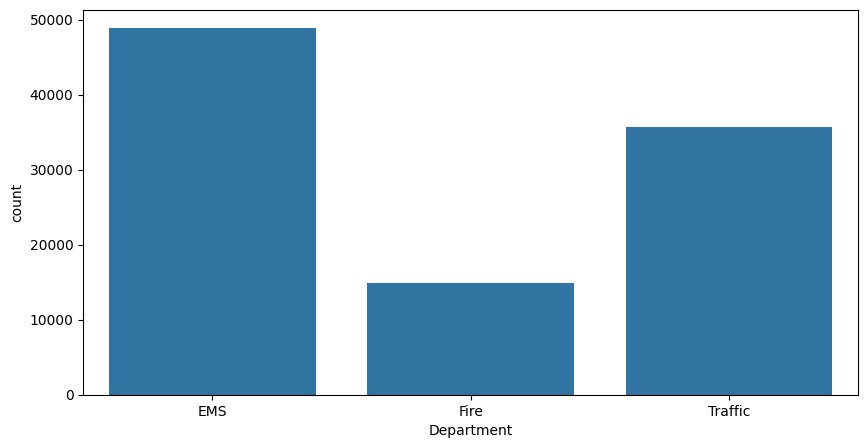

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Department',data=df)

#### Converting data type of time stamp column

In [17]:
type(df['timeStamp'].iloc[0])

str

In [18]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

#### Creating Hour, Month, Dayofweek column

In [19]:
def hour(timestamp):
    return timestamp.hour
def month(timestamp):
    return timestamp.month
def dow(timestamp):
    return timestamp.dayofweek

In [20]:
df['Hour'] = df['timeStamp'].apply(hour)
df['Month'] = df['timeStamp'].apply(month)
df['Day of Week'] = df['timeStamp'].apply(dow)

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['Day of Week'] = df['Day of Week'].map(dmap)

#### Data analysis using seaborn

<Axes: xlabel='Day of Week', ylabel='count'>

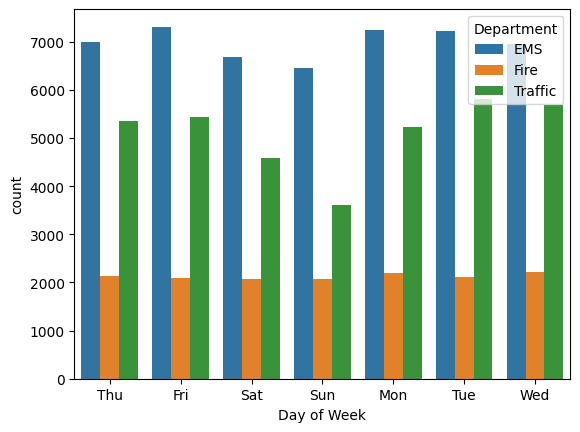

In [23]:
sns.countplot(x='Day of Week',data=df,hue='Department')

<Axes: xlabel='Month', ylabel='count'>

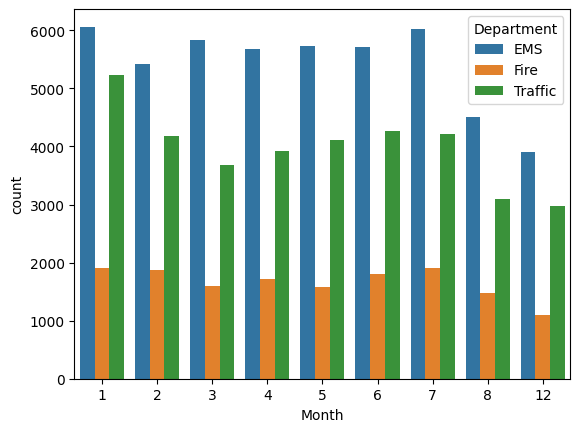

In [24]:
sns.countplot(x='Month',data=df,hue='Department')

#### Creating new column that contains date 

In [25]:
def date(timestamp):
    return timestamp.date()
df['Date']=df['timeStamp'].apply(date)

<Axes: xlabel='Date'>

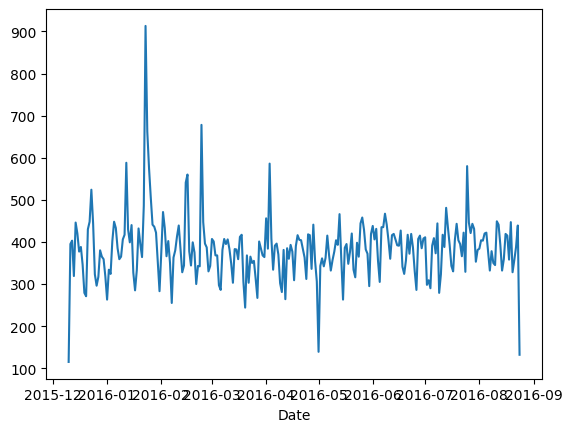

In [26]:
df.groupby('Date').count()['twp'].plot()

Text(0.5, 1.0, 'Traffic')

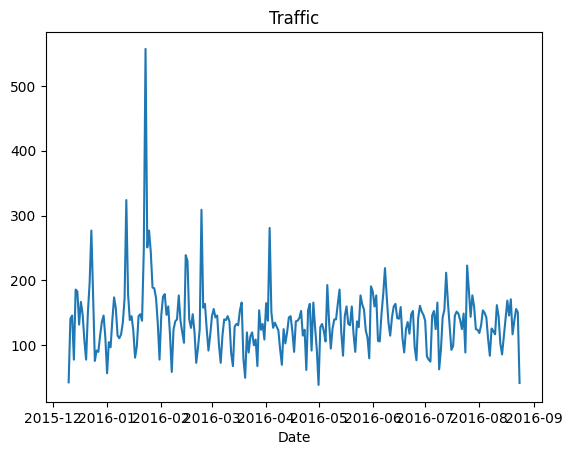

In [27]:
df[df['Department']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

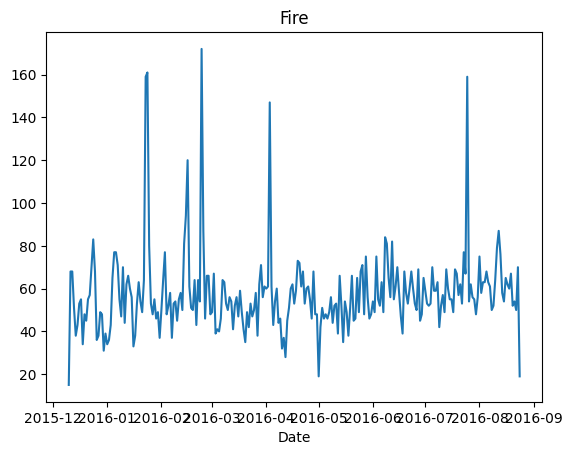

In [28]:
df[df['Department']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

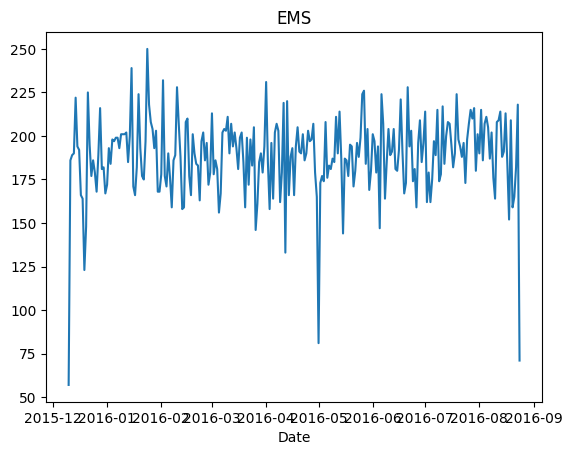

In [29]:
df[df['Department']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

In [30]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Department'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<Axes: xlabel='Hour', ylabel='Day of Week'>

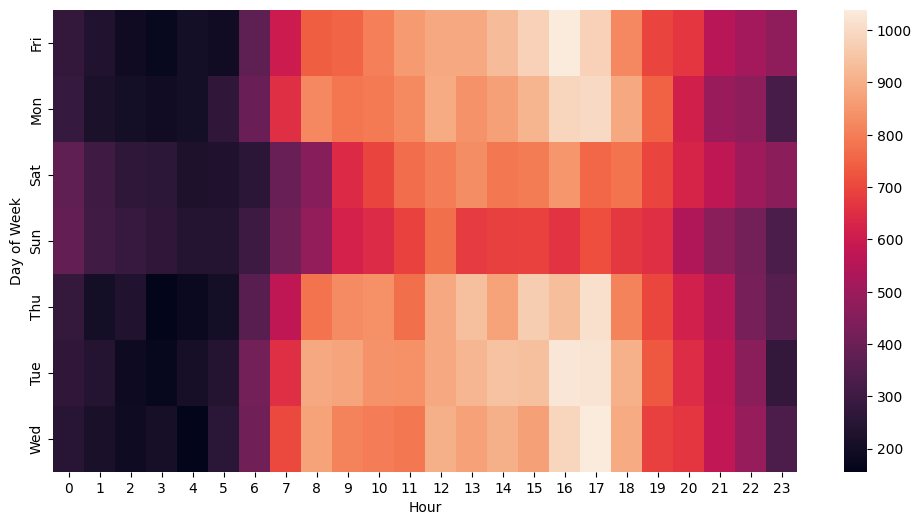

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

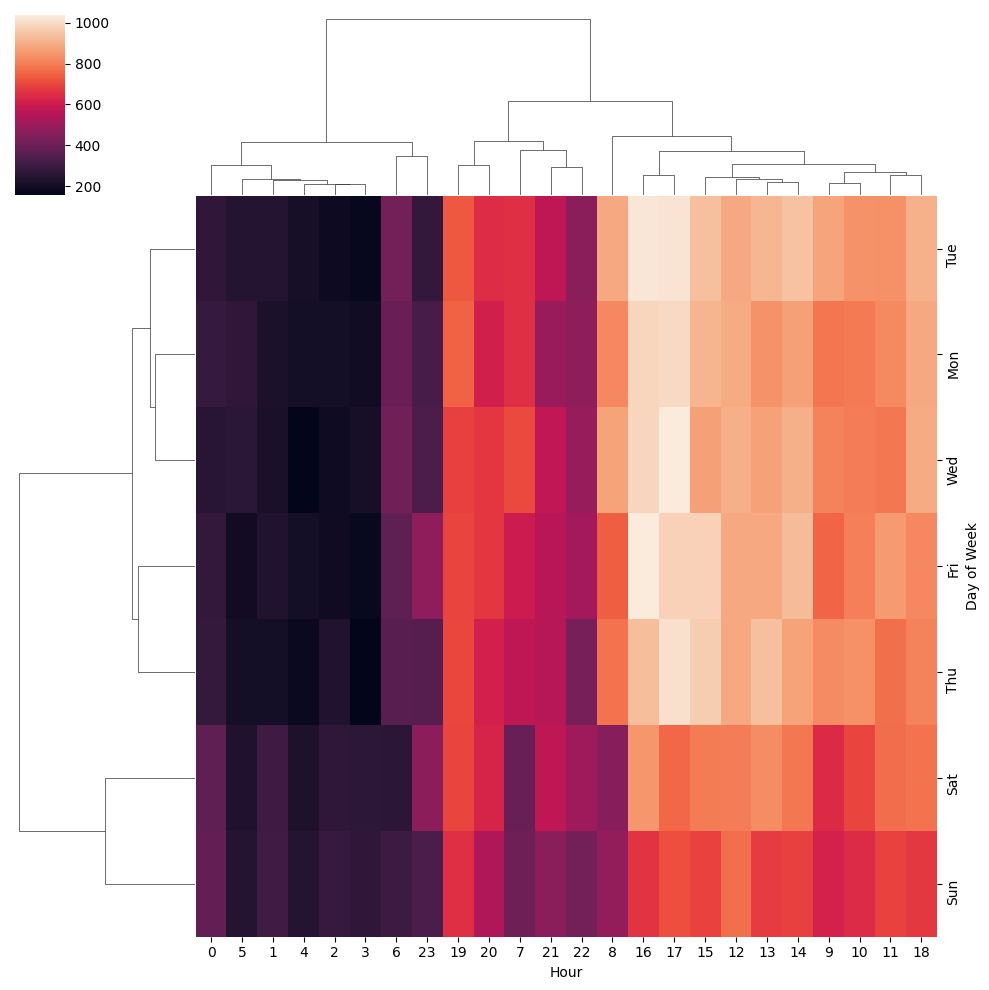

In [32]:
sns.clustermap(dayHour)

In [33]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Department'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day of Week'>

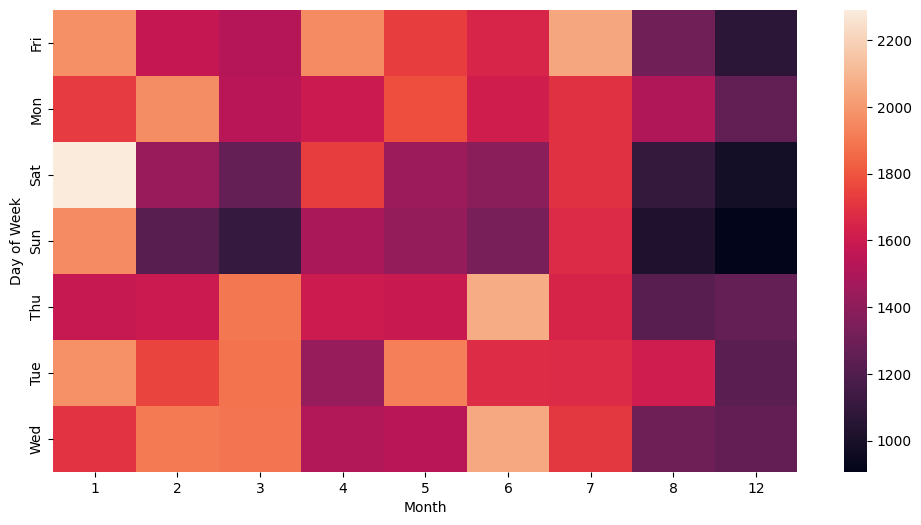

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

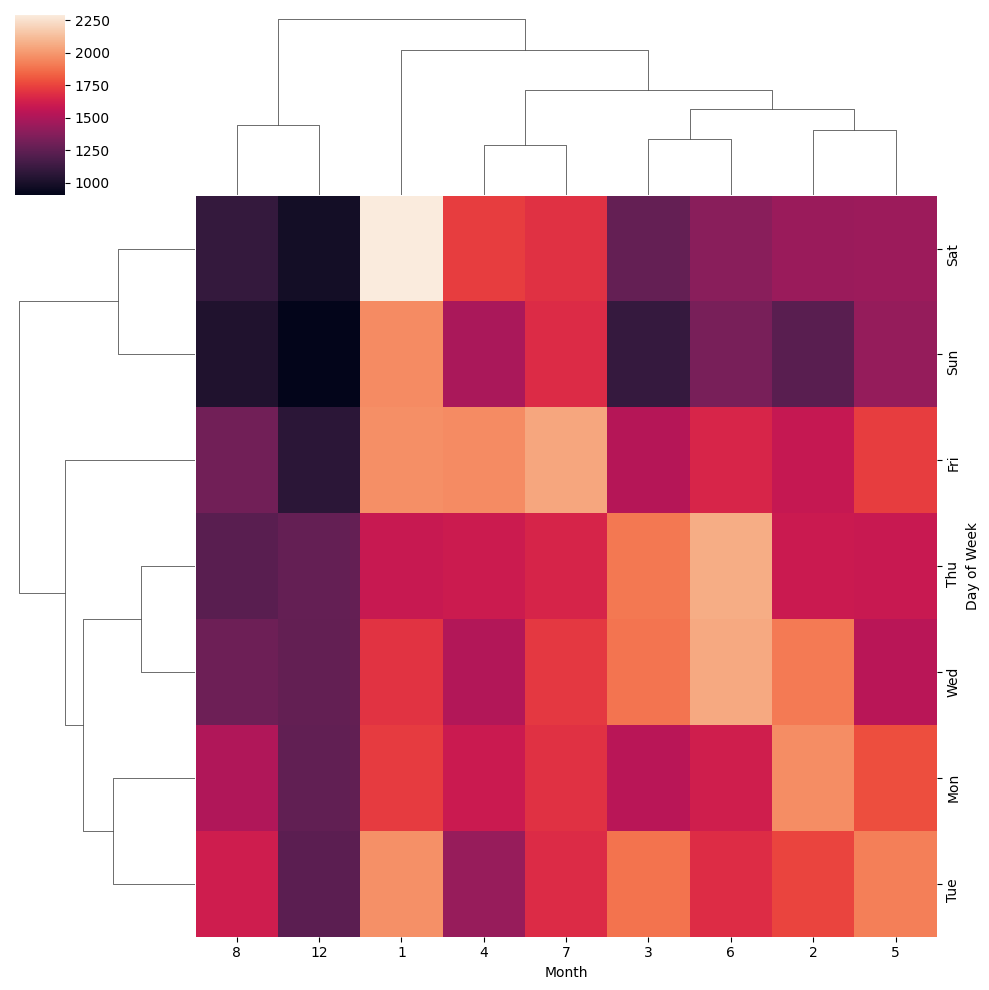

In [35]:
sns.clustermap(dayMonth)